In [2]:
import pandas as pd
import itertools

In [3]:
data = pd.read_csv('train.csv')

In [4]:
# ANSI escape codes for colors
RED = '\033[91m'
GREEN = '\033[92m'
YELLOW = '\033[93m'
BLUE = '\033[94m'
MAGENTA = '\033[95m'
CYAN = '\033[96m'
RESET = '\033[0m'  # Resets the color to default

In [5]:
# Checking for missing values in the train dataset
missing_values = data.isnull().sum()
missing_values_percentage = (missing_values / len(data)) * 100

missing_values_summary = pd.DataFrame({
    'Missing Values': missing_values, 
    'Percentage': missing_values_percentage
})

missing_values_summary[missing_values_summary['Missing Values'] > 0]


,Missing Values,Percentage


In [6]:
from sklearn.preprocessing import MinMaxScaler

# Selecting the columns to be scaled (all except date and time columns)
columns_to_scale = data.columns.difference(['Year', 'Month', 'Day', 'Hour', 'Minute'])

# Applying Min-Max Scaling
scaler = MinMaxScaler()
data[columns_to_scale] = scaler.fit_transform(data[columns_to_scale])

# Displaying the first few rows of the scaled data
scaled_data_head = data.head()
scaled_data_head

,Year,Month,Day,Hour,Minute,Clearsky DHI,Clearsky DNI,Clearsky GHI,Cloud Type,Dew Point,Temperature,Pressure,Relative Humidity,Solar Zenith Angle,Precipitable Water,Wind Direction,Wind Speed,Fill Flag
0,2009,1,1,0,0,0.0,0.0,0.0,0.0,0.387244,0.285714,0.740741,0.734296,0.598773,0.049749,0.961389,0.240310,0.0
1,2009,1,1,0,30,0.0,0.0,0.0,0.0,0.410023,0.285714,0.740741,0.793233,0.636380,0.048562,0.961389,0.240310,0.0
2,2009,1,1,1,0,0.0,0.0,0.0,0.4,0.387244,0.285714,0.740741,0.765866,0.674540,0.047506,0.966389,0.248062,0.0
3,2009,1,1,1,30,0.0,0.0,0.0,0.4,0.387244,0.265306,0.740741,0.765866,0.713067,0.046978,0.966389,0.240310,0.0
4,2009,1,1,2,0,0.0,0.0,0.0,0.4,0.387244,0.265306,0.740741,0.746256,0.751963,0.046582,0.972222,0.232558,0.0


In [7]:
# Checking for categorical columns in the dataset
categorical_columns = data.select_dtypes(include=['object']).columns

# Listing categorical columns, if any
categorical_columns_list = categorical_columns.tolist()
categorical_columns_list


[]

In [8]:
import pandas as pd

# Converting the date and time columns to datetime format
# Get DateTime column and index it
data['DateTime'] = pd.to_datetime(data[['Year', 'Month', 'Day', 'Hour', 'Minute']])
data = data.set_index('DateTime')

# Drop the original columns if they are no longer needed
data.drop(['Year', 'Month', 'Day', 'Hour', 'Minute'], axis=1, inplace=True)

data

,Clearsky DHI,Clearsky DNI,Clearsky GHI,Cloud Type,Dew Point,Temperature,Pressure,Relative Humidity,Solar Zenith Angle,Precipitable Water,Wind Direction,Wind Speed,Fill Flag
DateTime,,,,,,,,,,,,,
2009-01-01 00:00:00,0.000000,0.000000,0.000000,0.0,0.387244,0.285714,0.740741,0.734296,0.598773,0.049749,0.961389,0.240310,0.00
2009-01-01 00:30:00,0.000000,0.000000,0.000000,0.0,0.410023,0.285714,0.740741,0.793233,0.636380,0.048562,0.961389,0.240310,0.00
2009-01-01 01:00:00,0.000000,0.000000,0.000000,0.4,0.387244,0.285714,0.740741,0.765866,0.674540,0.047506,0.966389,0.248062,0.00
2009-01-01 01:30:00,0.000000,0.000000,0.000000,0.4,0.387244,0.265306,0.740741,0.765866,0.713067,0.046978,0.966389,0.240310,0.00
2009-01-01 02:00:00,0.000000,0.000000,0.000000,0.4,0.387244,0.265306,0.740741,0.746256,0.751963,0.046582,0.972222,0.232558,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-12-31 21:30:00,0.090265,0.533654,0.158043,0.4,0.829157,0.608163,0.703704,0.911324,0.425215,0.472156,0.566667,0.271318,1.00
2018-12-31 22:00:00,0.065487,0.373077,0.079022,0.4,0.822323,0.593878,0.703704,0.934059,0.456933,0.485352,0.580556,0.248062,1.00
2018-12-31 22:30:00,0.026549,0.110577,0.016933,0.7,0.822323,0.583673,0.703704,0.965844,0.489387,0.485352,0.577778,0.201550,0.57


In [9]:
import numpy as np

# Define a function to create sequences from the dataset
def create_sequences(data, window_size, target_columns):
    sequences = []
    targets = []
    
    for i in range(len(data) - window_size):
        sequence = data.iloc[i:i + window_size].to_numpy()
        target = data.iloc[i + window_size][target_columns].to_numpy()
        
        sequences.append(sequence)
        targets.append(target)
    
    return np.array(sequences), np.array(targets)

# Choosing a window size
window_size = 24

# Target columns for prediction
target_columns = ['Clearsky DHI', 'Clearsky DNI', 'Clearsky GHI']

# Creating sequences
X, y = create_sequences(data, window_size, target_columns)

# Displaying the shape of the created sequences and targets
X.shape, y.shape

((175272, 24, 13), (175272, 3))

In [10]:
# 80% for training
split_ratio = 0.9
split_index = int(X.shape[0] * split_ratio)

# Split the data into training and validation sets
X_train, X_val = X[:split_index], X[split_index:]
y_train, y_val = y[:split_index], y[split_index:]

# Verify the shape of the datasets
X_train.shape, X_val.shape, y_train.shape, y_val.shape


((157744, 24, 13), (17528, 24, 13), (157744, 3), (17528, 3))

In [11]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import TensorDataset, DataLoader

# Define the CNN model
class CNN1D(nn.Module):
    def __init__(self):
        super(CNN1D, self).__init__()
        self.conv1 = nn.Conv1d(in_channels=24, out_channels=64, kernel_size=3)
        self.conv2 = nn.Conv1d(in_channels=64, out_channels=128, kernel_size=3)
        self.pool = nn.MaxPool1d(kernel_size=2)
        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(128, 100)  # Adjusted input size
        self.fc2 = nn.Linear(100, 3)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = self.flatten(x)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x


# Create the model instance
model = CNN1D()

hyperparams_range = {
    'lr': [0.001, 0.0001],
    'batch_size': [32, 64],
}

# Check if GPU is available and move the model to GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)


CNN1D(
  (conv1): Conv1d(24, 64, kernel_size=(3,), stride=(1,))
  (conv2): Conv1d(64, 128, kernel_size=(3,), stride=(1,))
  (pool): MaxPool1d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (fc1): Linear(in_features=128, out_features=100, bias=True)
  (fc2): Linear(in_features=100, out_features=3, bias=True)
)

In [12]:
# Convert numpy arrays to PyTorch tensors
X_train_tensor = torch.tensor(X_train).float().to(device)
y_train_tensor = torch.tensor(y_train).float().to(device)
X_val_tensor = torch.tensor(X_val).float().to(device)
y_val_tensor = torch.tensor(y_val).float().to(device)

# Create TensorDatasets and DataLoaders
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
val_dataset = TensorDataset(X_val_tensor, y_val_tensor)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=False)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)


In [13]:
# Function to train and validate the model
def train_and_validate_model(hyperparams, patience=10):
    # Reinitialize model and other components here with current hyperparameters
    model = CNN1D().to(device)
    criterion = nn.MSELoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=hyperparams['lr'])
    scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, 'min', patience=5)

    train_loader = DataLoader(train_dataset, batch_size=hyperparams['batch_size'], shuffle=True)
    val_loader = DataLoader(val_dataset, batch_size=hyperparams['batch_size'], shuffle=False)

    best_val_loss = float('inf')
    epochs_no_improve = 0
    model_history = {'epoch': [], 'loss': [], 'val_loss': [], 'accuracy': []}

   # Training loop
    for epoch in range(20):  # Number of epochs
        model.train()
        for inputs, targets in train_loader:
            # Move data to the device
            inputs, targets = inputs.to(device), targets.to(device)

            # Zero the parameter gradients
            optimizer.zero_grad()

            # Forward pass
            outputs = model(inputs)
            loss = criterion(outputs, targets)

            # Backward pass and optimize
            loss.backward()
            optimizer.step()

        # Validation step
        model.eval()
        val_loss = 0.0
        with torch.no_grad():
            for inputs, targets in val_loader:
                inputs, targets = inputs.to(device), targets.to(device)
                outputs = model(inputs)
                val_loss += criterion(outputs, targets).item()

        # Calculate accuracy
        accuracy = 100 * (1 - val_loss / len(val_loader))
        model_history['epoch'].append(epoch+1)
        model_history['loss'].append(loss.item())
        model_history['val_loss'].append(val_loss / len(val_loader))
        model_history['accuracy'].append(accuracy)

        if epoch % 5 == 0:  # Print details every 5 epochs
            print(f'{CYAN}Epoch {epoch+1}, Loss: {loss.item()}, Validation Loss: {val_loss / len(val_loader)}, Accuracy: {accuracy}{RESET}')

        # Early Stopping and Save Best Model
        if val_loss < best_val_loss:
            best_val_loss = val_loss
            epochs_no_improve = 0
            torch.save(model.state_dict(), 'best_model.pth')
            print(f'{GREEN}Validation loss decreased to {best_val_loss:.6f}, Model Saved{RESET}')
        else:
            epochs_no_improve += 1
            if epochs_no_improve >= patience:
                print(f'{RED}Early stopping at epoch {epoch+1}{RESET}')
                break

        scheduler.step(val_loss)

    return model_history

In [14]:
# Perform Grid Search and Track Model Performances
model_performances = []
for hyperparams in itertools.product(*[[(key, val) for val in values] for key, values in hyperparams_range.items()]):
    hyperparams_dict = dict(hyperparams)
    print(f"Training with hyperparameters: {hyperparams_dict}")
    
    history = train_and_validate_model(hyperparams_dict)
    model_performances.append((hyperparams_dict, history))


Training with hyperparameters: {'lr': 0.001, 'batch_size': 32}
Epoch 1, Loss: 0.000556080718524754, Validation Loss: 0.0003048665508971561, Accuracy: 99.96951334491028
Validation loss decreased to 0.167067, Model Saved
Validation loss decreased to 0.132519, Model Saved
Validation loss decreased to 0.092108, Model Saved
Validation loss decreased to 0.059982, Model Saved
Epoch 6, Loss: 0.00032513117184862494, Validation Loss: 0.00011178960435444404, Accuracy: 99.98882103956456
Validation loss decreased to 0.054302, Model Saved
Epoch 11, Loss: 8.546662866137922e-05, Validation Loss: 0.00012149149786663836, Accuracy: 99.98785085021333
Validation loss decreased to 0.047022, Model Saved
Validation loss decreased to 0.045980, Model Saved
Validation loss decreased to 0.040004, Model Saved
Validation loss decreased to 0.038484, Model Saved
Epoch 16, Loss: 1.1223135516047478e-05, Validation Loss: 0.00010189756392015877, Accuracy: 99.98981024360798
Training with hyperparameters: {'lr': 0.001, 'ba

In [15]:
# Sort models by accuracy and select the best one
best_model_info = sorted(model_performances, key=lambda x: max(x[1]['accuracy']), reverse=True)[0]
best_hyperparams, best_history = best_model_info

# Load the Best Model
best_model = CNN1D().to(device)
best_model.load_state_dict(torch.load('best_model.pth'))

<All keys matched successfully>

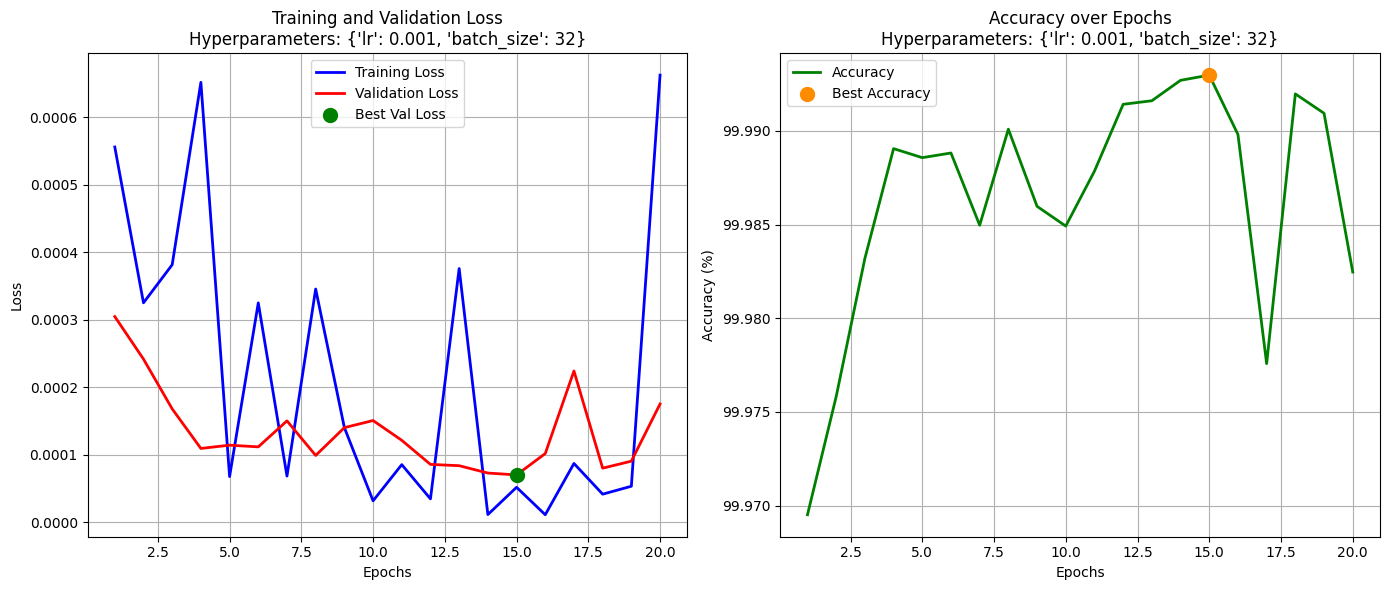

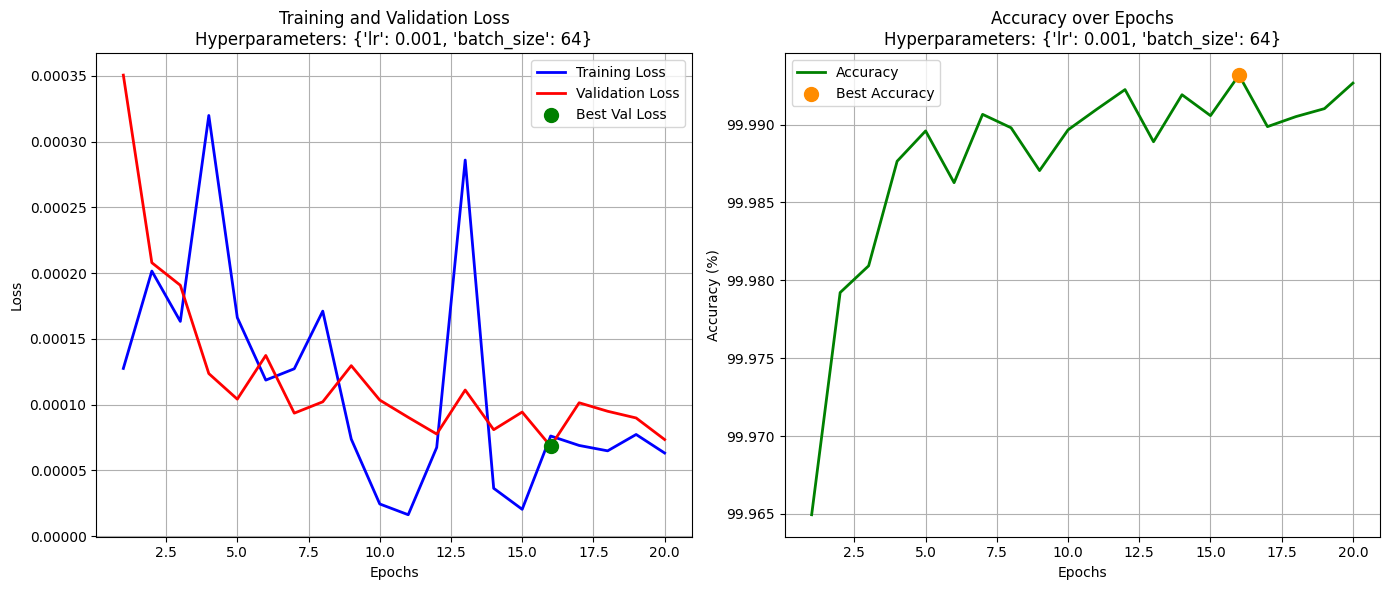

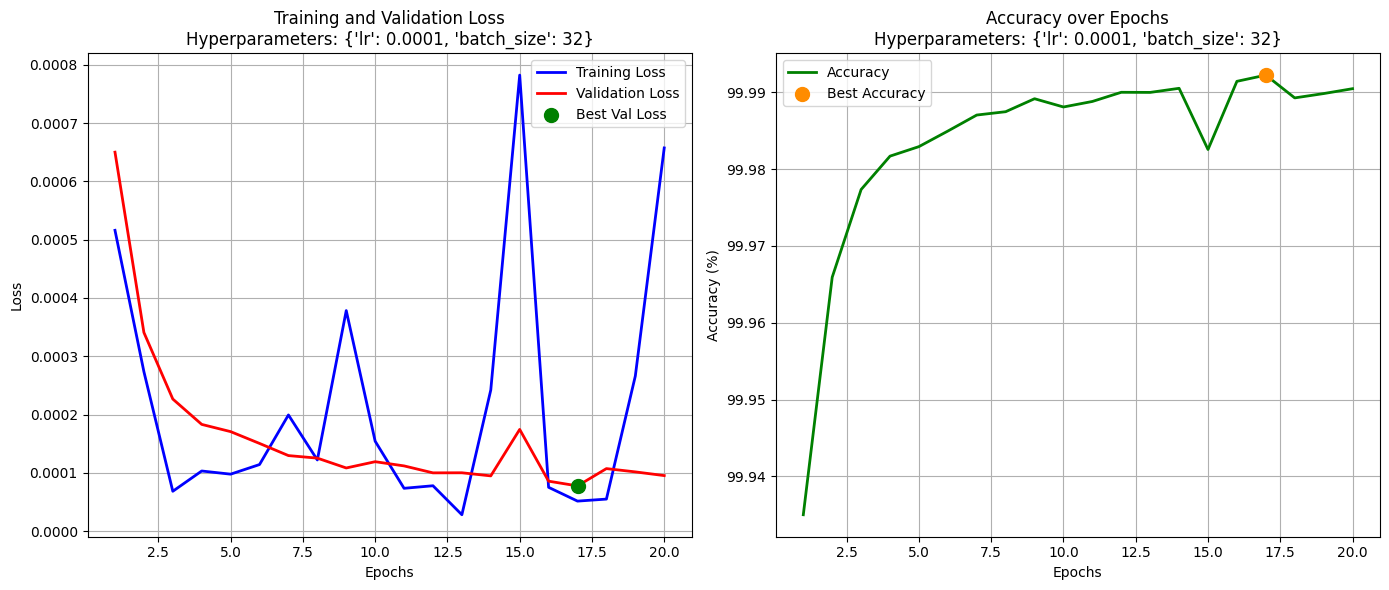

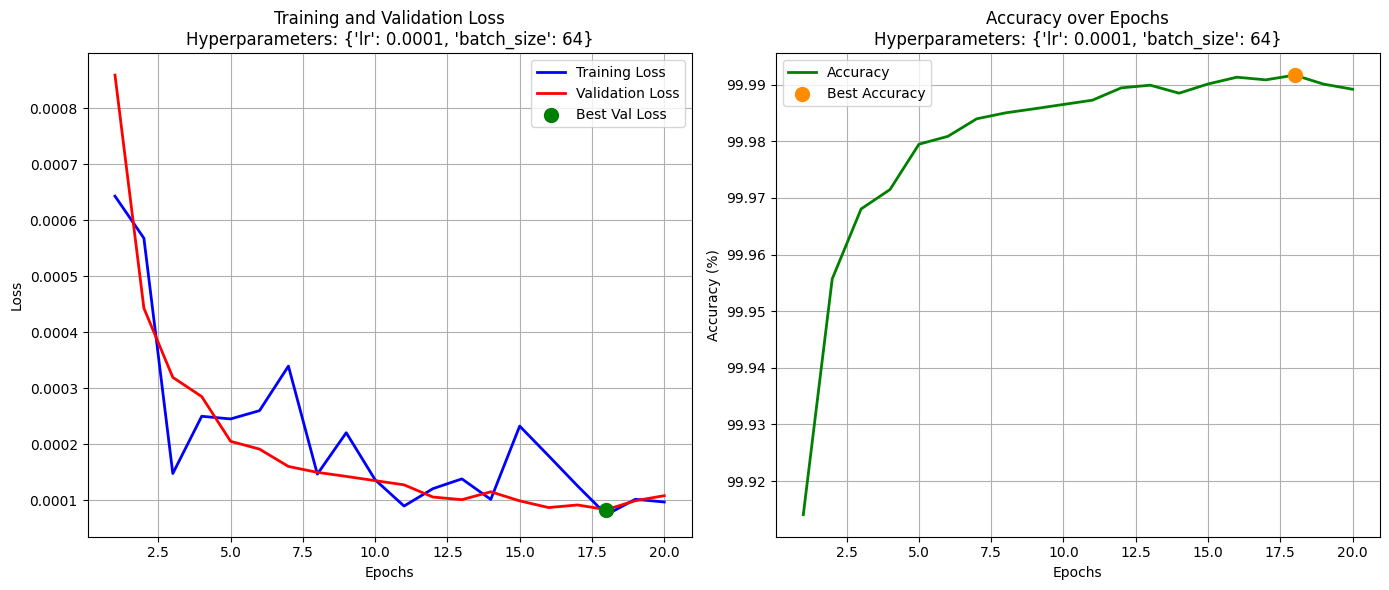

In [16]:
import matplotlib.pyplot as plt

# Function to plot the metrics with enhanced visuals
def plot_model_performance(model_history, hyperparams):
    epochs = model_history['epoch']
    loss = model_history['loss']
    val_loss = model_history['val_loss']
    accuracy = model_history['accuracy']
    best_epoch = accuracy.index(max(accuracy)) + 1  # Find the epoch with the best accuracy

    # Plot Loss and Validation Loss
    plt.figure(figsize=(14, 6))
    plt.subplot(1, 2, 1)
    plt.plot(epochs, loss, label='Training Loss', color='blue', linestyle='-', linewidth=2)
    plt.plot(epochs, val_loss, label='Validation Loss', color='red', linestyle='-', linewidth=2)
    plt.scatter(best_epoch, val_loss[best_epoch-1], color='green', s=100, label='Best Val Loss', zorder=5)  # Highlight best val loss
    plt.title(f'Training and Validation Loss\nHyperparameters: {hyperparams}')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)

    # Plot Accuracy
    plt.subplot(1, 2, 2)
    plt.plot(epochs, accuracy, label='Accuracy', color='green', linestyle='-', linewidth=2)
    plt.scatter(best_epoch, accuracy[best_epoch-1], color='darkorange', s=100, label='Best Accuracy', zorder=5)  # Highlight best accuracy
    plt.title(f'Accuracy over Epochs\nHyperparameters: {hyperparams}')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy (%)')
    plt.legend()
    plt.grid(True)

    plt.tight_layout()
    plt.show()

# Iterate over all models and plot their performance
for hyperparams, history in model_performances:
    plot_model_performance(history, hyperparams)


In [17]:
def print_best_scores(model_performances):
    for hyperparams, history in model_performances:
        best_accuracy_epoch = history['accuracy'].index(max(history['accuracy'])) + 1
        best_accuracy = max(history['accuracy'])
        best_val_loss_epoch = history['val_loss'].index(min(history['val_loss'])) + 1
        best_val_loss = min(history['val_loss'])

        print(f"Hyperparameters: {hyperparams}")
        print(f"Best Accuracy: {best_accuracy:.2f}% at Epoch {best_accuracy_epoch}")
        print(f"Best Validation Loss: {best_val_loss:.4f} at Epoch {best_val_loss_epoch}\n")

# Print the best scores for all models
print_best_scores(model_performances)


Hyperparameters: {'lr': 0.001, 'batch_size': 32}
Best Accuracy: 99.99% at Epoch 15
Best Validation Loss: 0.0001 at Epoch 15

Hyperparameters: {'lr': 0.001, 'batch_size': 64}
Best Accuracy: 99.99% at Epoch 16
Best Validation Loss: 0.0001 at Epoch 16

Hyperparameters: {'lr': 0.0001, 'batch_size': 32}
Best Accuracy: 99.99% at Epoch 17
Best Validation Loss: 0.0001 at Epoch 17

Hyperparameters: {'lr': 0.0001, 'batch_size': 64}
Best Accuracy: 99.99% at Epoch 18
Best Validation Loss: 0.0001 at Epoch 18

